# Analysis of the LUXE EDS Prototype Data

## Imports and Definitions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [8]:
plt.rcParams.update({
    "figure.figsize": (6,4),
    "font.size": 15, 
    "legend.fontsize": 13, 
    "legend.labelspacing": 0.2, 
    "figure.dpi": 300, 
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],
})

## Simulations of Electron-Laser Collisions

In [14]:
# DESY NAF
dataDir = '/data/dust/group/luxe/MCProduction/LUXE320/luxeedsprototype/simulations'

# personal data directory -> adapt to your needs
# dataDir = '../data/simulations'

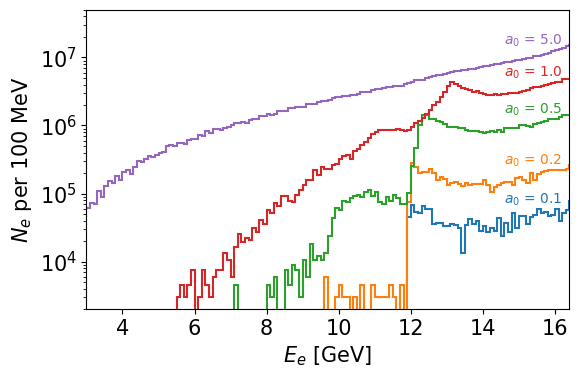

In [67]:
# select values of xi to show
Xi = ['0p10','0p20','0p50','1p00', '5p00']
Xi_labels = [0.1, 0.2, 0.5, 1, 5]

# bin width in [GeV]
binWidth = 0.1

bins = np.arange(0, 16.5+0.01, binWidth)

fig, ax = plt.subplots()

for i,xi in enumerate(Xi):
    
    filename = f'{dataDir}/elaser_xi{xi}_40TW_particles.h5'

    with h5py.File(filename) as f:
        electronEnergy = f['final-state/electron/momentum'][()][:,0]
        electronWeights = f['final-state/electron/weight'][()]

    hist = np.histogram(electronEnergy, bins, weights=electronWeights)

    ax.stairs(*hist, lw=1.5, label=r'$a_0$ = {:.1f}'.format(Xi_labels[i]))
    ax.text(14.6, hist[0][-5]*1.2, f'$a_0$ = {Xi_labels[i]:.1f}', size=10, c=f'C{i}')

#ax.legend()
ax.set(xlabel='$E_e$ [GeV]', xlim=(3, 16.4), 
       ylabel='$N_e$ per 100 MeV', yscale='log', ylim=(2e3, 5e7))

fig.tight_layout()
fig.savefig('plots/electronComptonSpectra.pdf')
fig.set(dpi=100)

plt.show()